# Statestiek - PCA

### Van: Mart Veldkamp

# Inhoudsopgave

1. [Inleiding](#1)
2. [Het probleem](#2)
3. [Library's importeren](#3)
4. [Data ophalen]()
5. [Heatmap]()
6. [Data ophalen]()
7. [Histogram]()
8. [PCA]()
9. [Classifier kiezen]()
    - [KNN (K-Nearest Neighbour)]()
    - [Logistic Regression]()
10. [Resultaat (+PCA)]()
    - [Data voorbereiden]()
    - [Splits Train en Test op]()
    - [Accuracy modellen]()
        - [KNN]()
        - [Logistic regression]()
11. [Resultaat (-PCA)]()
    - [Data voorbereiden]()
    - [Splits Train en Test op]()
    - [Accuracy modellen]()
        - [KNN]()
        - [Logistic regression]()
12. [Evaluatie]()
13. [Bronnen]()

# 1. Inleiding <a class='anchor' id='1'></a>

Deze opdracht is onderdeel van het overkoepelende vak statestiek, dit is één van de meerdere opgaves die ik gebruik in dit vak om te laten zien hoe statestiek gebruikt kan worden voor verschillende doeleinde.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem <a class='anchor' id='2'></a>

Het is niet zo zeer een probleem wat ik vandaag ga oplossen, als het een demostratie is. Ik wil graag vandaag laten zien hoe PCA werkt binnen statestiek. Wat het is, en ten slot wat het doet met resultaten.

# 3. Library's importeren

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import researchpy, numpy, pandas
import scipy.stats
from scipy import stats
import math
import statistics
import researchpy as rp
import scipy.stats as stats
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 4. Data ophalen

In [71]:
data = pd.read_csv('Airlinesatisfaction.csv', sep=",")
data = data.drop(columns = ["Unnamed: 0", "id"], axis=1) 

data = data.dropna()
#Voor alles wat geen dataType is, moeten we zelf een datatype "assignen"
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  int64  
 4   Class                              103594 non-null  int64  
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

# 5. Heatmap

<AxesSubplot:>

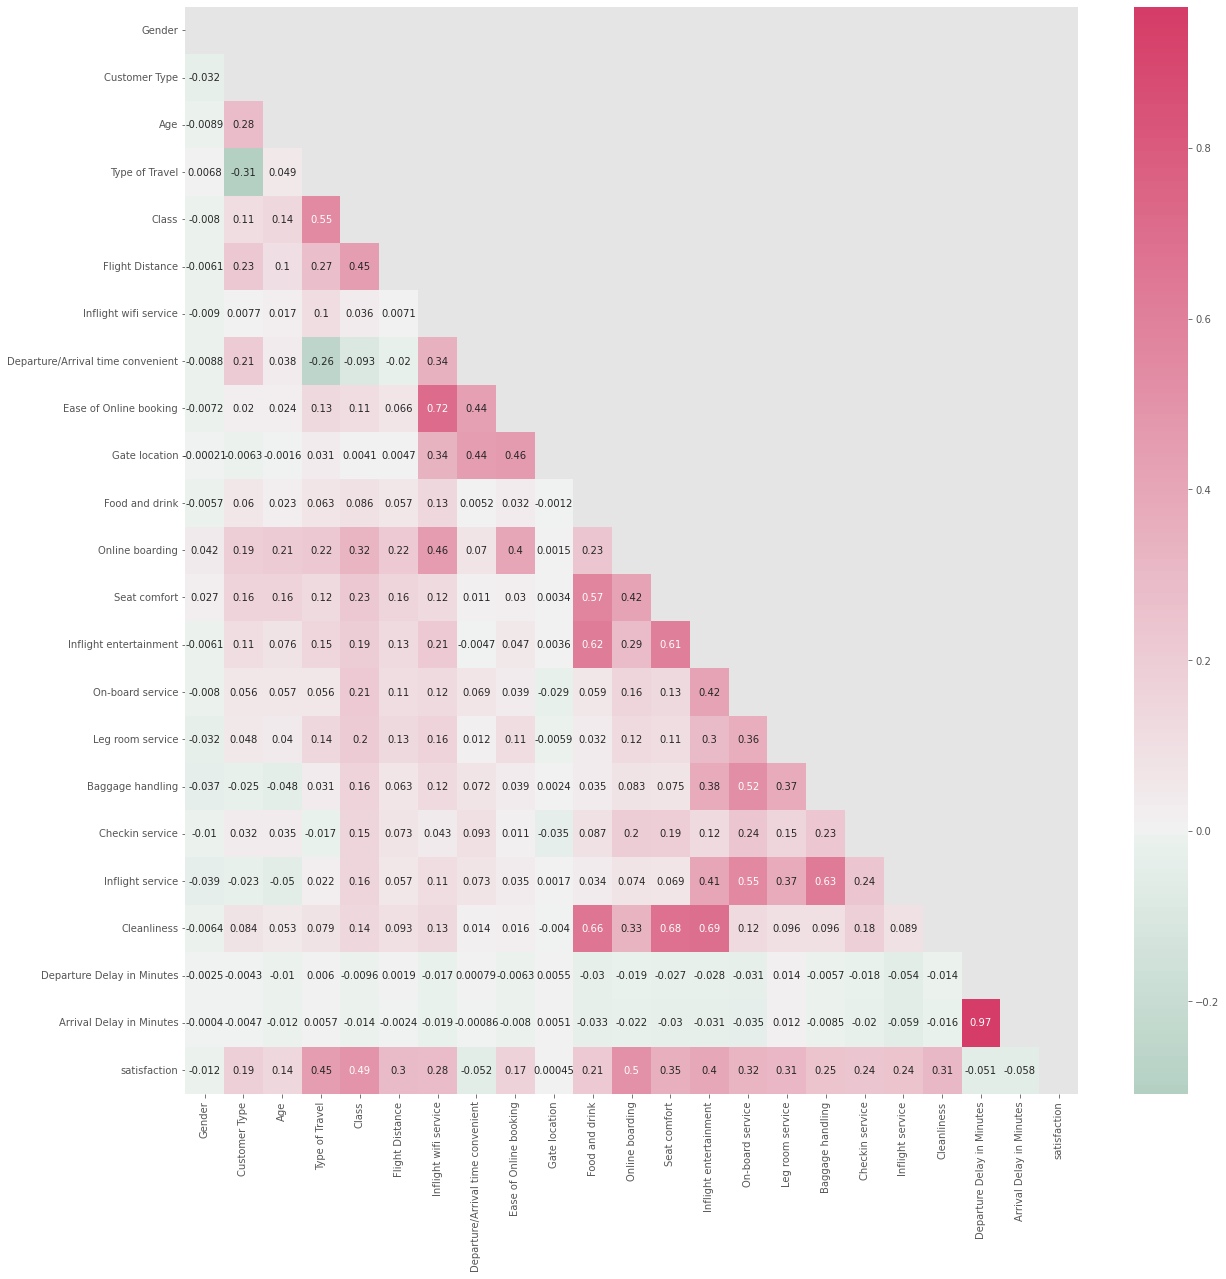

In [72]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, annot=True)

# 6. Data normaliseren

In [73]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [74]:
print(data[0:5])
scaler = StandardScaler()
data_z = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
print(data_z[0:5])

   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              1   13               0      2              460   
1       0              0   25               1      3              235   
2       1              1   26               1      3             1142   
3       1              1   25               1      3              562   
4       0              1   61               1      3              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3           

# 7. Histogram

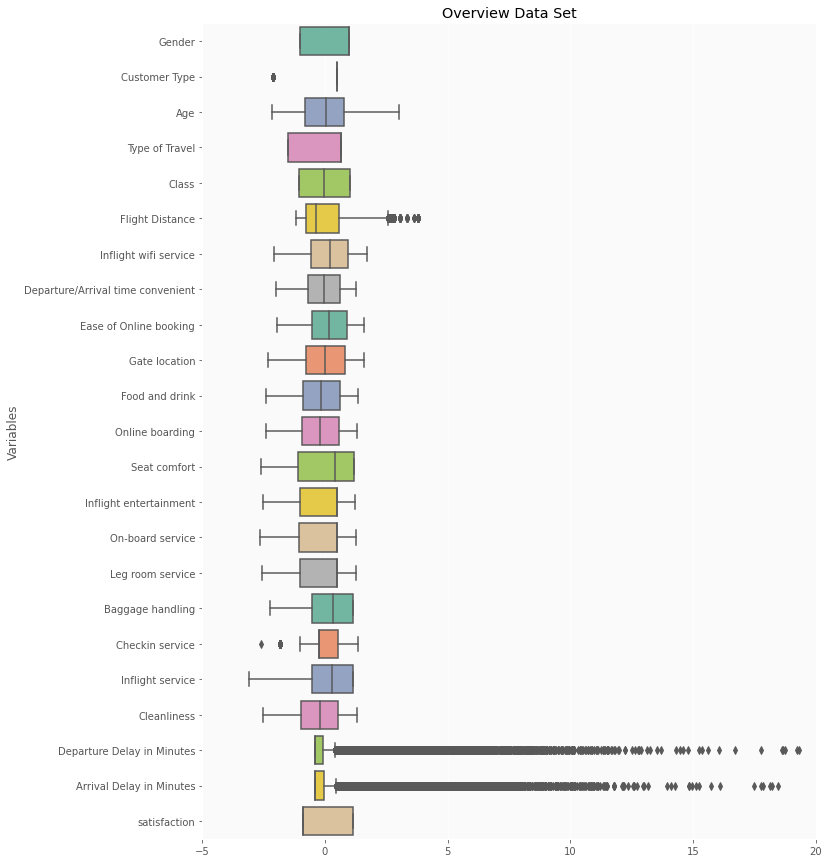

In [75]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 20))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data_z, 
  orient = 'h', 
  palette = 'Set2')

# 8. PCA

In [76]:
X=data_z.loc[:, 'Inflight wifi service':'Cleanliness'].values
y=data_z.loc[:, 'satisfaction'].values

pca = PCA()
X_r = pca.fit(X).transform(X)

In [77]:
x=data.iloc[:,0:22]

target=data.iloc[:,22]

In [78]:
cov_mat=np.cov(X.T)
eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s'%eig_vals)
print('Eigenvectors \n%s'%eig_vecs)


Eigenvalues 
[3.80028184 2.36185795 2.16618253 1.0633655  0.95097995 0.70019664
 0.18797921 0.54020184 0.51460648 0.46927373 0.25313152 0.29519661
 0.32854446 0.36833689]
Eigenvectors 
[[ 2.36986839e-01  4.48128579e-01  5.37427430e-02  2.14589701e-01
  -2.14086561e-01  9.21213537e-02 -1.50184281e-01 -9.00160203e-02
   2.87554474e-01 -2.29793340e-01  5.57916752e-01 -1.35372072e-01
  -3.77788439e-01 -3.59170080e-02]
 [ 1.03139328e-01  4.16691531e-01 -2.00916464e-02 -3.58431783e-01
   3.47251035e-01 -1.76035850e-03  7.10290728e-02  7.03709060e-01
   1.15048815e-01  1.96958710e-01  9.52383962e-02  4.65392257e-02
   4.94903896e-02  1.73483712e-02]
 [ 1.64850838e-01  5.36055848e-01  5.48076681e-02  1.46129607e-01
  -1.28975976e-01  2.57089317e-02  5.55538340e-02 -8.36650126e-02
   1.28459381e-01 -1.15923811e-01 -7.69270965e-01 -1.05471370e-01
  -2.43242573e-02  1.71735861e-02]
 [ 6.70841419e-02  4.29774161e-01  4.26273753e-02 -4.77999422e-01
   9.64032139e-02 -1.61379279e-01 -1.37946744e-02

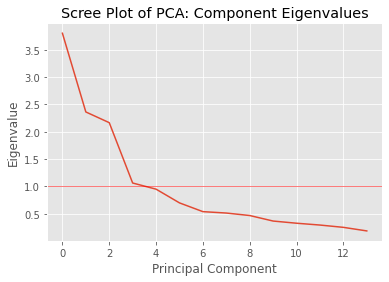

In [79]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator
    ax=figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()
    
scree_plot()

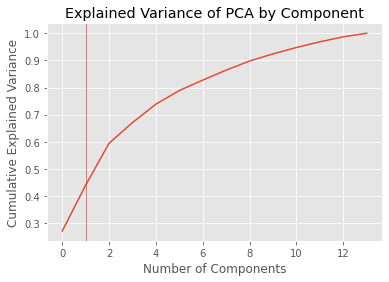

In [80]:
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator
    ax=figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()
var_explained()

No handles with labels found to put in legend.


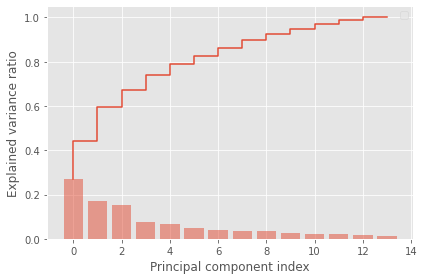

In [81]:

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [82]:
X_r = pca.fit(X).transform(X)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[3.80028184 2.36185795 2.16618253 1.0633655  0.95097995 0.70019664
 0.54020184 0.51460648 0.46927373 0.36833689 0.32854446 0.29519661
 0.25313152 0.18797921]
Eigenvectors 
[[-2.36986839e-01 -1.03139328e-01 -1.64850838e-01 -6.70841419e-02
  -3.07151765e-01 -2.81677412e-01 -3.45007721e-01 -4.27781127e-01
  -2.77578888e-01 -2.22103752e-01 -2.62209282e-01 -1.82509046e-01
  -2.65355094e-01 -3.56307933e-01]
 [-4.48128579e-01 -4.16691531e-01 -5.36055848e-01 -4.29774161e-01
   1.62372794e-01 -1.49476943e-01  1.57856474e-01  1.81069341e-01
   6.90151268e-02  1.36048018e-02  5.58321942e-02  4.84865266e-02
   6.21821380e-02  1.81083449e-01]
 [ 5.37427430e-02 -2.00916464e-02  5.48076681e-02  4.26273753e-02
   3.49132963e-01  1.64745831e-01  3.14212129e-01  6.95279514e-02
  -3.82140536e-01 -2.99609102e-01 -4.33311414e-01 -1.33561671e-01
  -4.42712366e-01  3.19217660e-01]
 [-2.14589701e-01  3.58431783e-01 -1.46129607e-01  4.77999422e-01
   2.10212615e-01 -5.99567644e-01  9.36101993e-04

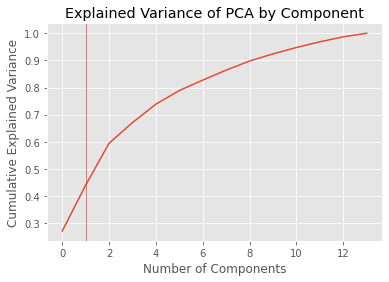

In [83]:
def var_explained():
 import numpy as np
 from matplotlib.pyplot import figure, show
 from matplotlib.ticker import MaxNLocator
 ax = figure().gca()
 ax.plot(np.cumsum(pca.explained_variance_ratio_))
 ax.xaxis.set_major_locator(MaxNLocator(integer=True))
 plt.xlabel('Number of Components')
 plt.ylabel('Cumulative Explained Variance')
 plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
 plt.title('Explained Variance of PCA by Component')
 show()
var_explained()

In [84]:
def loadings():
 loadings = pca.components_
 results = pd.DataFrame(loadings)
 print(results)
loadings()

          0         1         2         3         4         5         6   \
0  -0.236987 -0.103139 -0.164851 -0.067084 -0.307152 -0.281677 -0.345008   
1  -0.448129 -0.416692 -0.536056 -0.429774  0.162373 -0.149477  0.157856   
2   0.053743 -0.020092  0.054808  0.042627  0.349133  0.164746  0.314212   
3  -0.214590  0.358432 -0.146130  0.477999  0.210213 -0.599568  0.000936   
4   0.214087 -0.347251  0.128976 -0.096403  0.034585  0.018174 -0.096060   
5   0.092121 -0.001760  0.025709 -0.161379  0.005357  0.174967 -0.069509   
6   0.090016 -0.703709  0.083665  0.530557  0.024628 -0.069420 -0.052503   
7  -0.287554 -0.115049 -0.128459  0.441440 -0.375258  0.287593  0.338985   
8  -0.229793  0.196959 -0.115924  0.031173 -0.301746  0.314982  0.317618   
9   0.035917 -0.017348 -0.017174  0.013114  0.047056 -0.040213 -0.016496   
10  0.377788 -0.049490  0.024324 -0.171702 -0.637615 -0.427968  0.249178   
11  0.135372 -0.046539  0.105471 -0.107853  0.185317 -0.279716  0.663648   
12 -0.557917

# 9. Classifier kiezen

Voor deze dataset zal ik gebruik maken van de KNN classifier en logistic regression. Zoals eerder vermeld zal ik een run doen zonder feature selectie, en 1 met. Ik denk dat logistic regression beter zal scoren dan KNN. KNN werkt op basis van dichtbijzijnde datapunten, waarbij bij logistic regression gekeken wordt naar hoe belangrijk de features zijn. Ik denk dat logistic regression beter zal scoren omdat ik voorspel dat er bij hartziekte zekere lijnen zijn te trekken en veel correlatie mogelijk is. KNN is beter als er niet en bepaalde lijn te trekken is.

## KNN (K-Nearest Neighbour)

Belangrijke parameters KNN:
* Neighbors
* Weight function
* p (Welke methode voor afstand bepaling)

## Logistic Regression

Belangrijke parameters logistic regression:
* Penalty

# 10. Resultaat (+PCA)

## Data voorbereiden

In [85]:
from sklearn.preprocessing import LabelEncoder

for column in data_z.select_dtypes(exclude=['int64']):
    data_z[column] = LabelEncoder().fit_transform(data_z[column])

In [86]:
Xe = X_r
Xe.shape

(103594, 14)

In [87]:
Ye = data_z['satisfaction']
Ye.shape

(103594,)

## Splits Train en Test op

In [88]:
X_traine, X_teste, Y_traine, Y_teste = train_test_split(Xe, Ye, test_size = 0.2, random_state = 6) 

## Accuracy modellen

### KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

knne = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', p = 1)
knne.fit(X_traine, Y_traine)
knn_prede = knne.predict(X_teste)

print("De accuracy is: ", accuracy_score(knn_prede, Y_teste)*100, "%")

De accuracy is:  91.7660118731599 %


### Logistic regression

In [90]:
lre = LogisticRegression(penalty='none')
lre.fit(X_traine, Y_traine)
lr_prede = lre.predict(X_teste)
print("De accuracy is: ", accuracy_score(lr_prede, Y_teste)*100, "%")

De accuracy is:  81.74139678555915 %


# 11. Resultaat (-PCA)

## Data voorbereiden

In [91]:
X = data.drop('satisfaction', axis = 1)
X.shape

(103594, 22)

In [92]:
Y = data['satisfaction']
Y.shape

(103594,)

## Splits Train en Test op

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 6) 

## Accuracy modellen

### KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

knn = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', p = 1)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
print("De accuracy is: ", accuracy_score(knn_pred, Y_test)*100, "%")

De accuracy is:  82.53294077899513 %


### Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'none')
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
print("De accuracy is: ", accuracy_score(lr_pred, Y_test)*100, "%")

De accuracy is:  77.28654857859935 %


C:\Users\martv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 12. Evaluatie

In het kort dit zijn onze resultaten:
- **KNN**
    - Zonder PCA: 82.53294077899513 %
    - Met PCA: 91.7660118731599 %
    
Voor KNN werkt PCA super goed, met bijna een 10% verhoging.

- **Logistic Regression**
    - Zonder PCA: 77.28654857859935 %
    - Met PCA: 81.74139678555915 %

Voor Logistic Regression werkt PCA wat minder goed, met een 4% verhoging is het een verbetering. Maar geen grote.

# 13. Bronnen

- [PCA toepassing](https://dlo.mijnhva.nl/d2l/le/content/354957/viewContent/1021549/View)
- [What is PCA?](https://en.wikipedia.org/wiki/Principal_component_analysis)